In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [24]:
def load_df(path):
    # Create a DataFrame from the data
    df = pd.read_csv(path)
    df['Memory'] = df['Memory'].astype(float)
    df['CPU'] = df['CPU'].astype(float)
    for name in ['CPU','Memory']:
        df[name+'_avg'] = df[name].rolling(window=20).mean()
        df[name+'_avg'] = df[name+'_avg'].fillna(method='ffill')
        df[name+'_avg'] = df[name+'_avg'].fillna(method='bfill')
    # Assuming 'df' is your DataFrame with the desired column named 'Time' as a datetime column
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    df['T'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds()
    df['Time'] = df['Time'].dt.strftime('%H:%M:%S')
    # Set the 'Time' column as the index of the DataFrame
    df.set_index('T', inplace=True)
    return df

def plot_with_ma(df, col):
    ylabel = col.replace('_', ' ')
    # Plot the desired column as a time series
    ax = df[col].plot(label='Data')
    df[col+"_avg"].shift(-10).plot(color="red",label='Moving Average')
    # Set plot labels
    plt.xlabel('Time elapsed (s)')
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')
    plt.axvline(60, color='black', alpha=0.4)
    plt.axvline(180, color='black', alpha=0.4)
    plt.xlim(0, 239)
    plt.ylim(0, max(df[col])*1.1)
    # Display the plot
    plt.show()

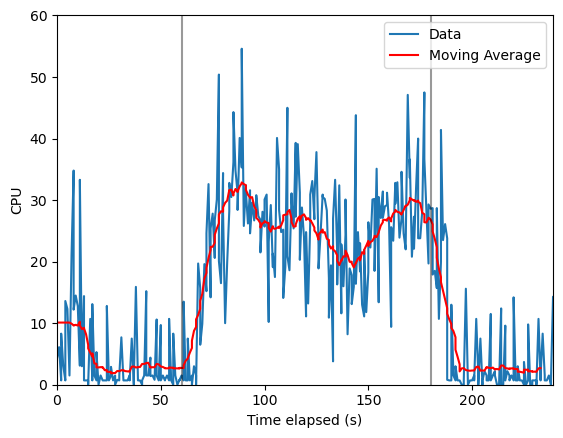

In [25]:
df = load_df('full_data/server_ANY_50K.csv')
plot_with_ma(df, "CPU")